In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# cities list will hold all 1500 random cities
cities = []
meta_cities = []
# using citipy.nearest_city on every set of lat and long
for e in coordinates:
    city = citipy.nearest_city(e[0], e[1]).city_name
    
    # holding onto the citipy.city object for future reference
    meta_city = citipy.nearest_city(e[0], e[1])
    
    if city not in cities:
        cities.append(city)
        meta_cities.append(meta_city)
# restart and run the whole thing again if len(cities) < 500
len(cities)

634

In [6]:
from config import weather_api_key
import requests

In [7]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [8]:
city_url = url + '&q=' + 'Boston'
city_weather = requests.get(city_url)
boston_data = city_weather.json()

In [9]:
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 65.26,
  'feels_like': 64.54,
  'temp_min': 60.55,
  'temp_max': 69.8,
  'pressure': 1019,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 309, 'gust': 10},
 'clouds': {'all': 40},
 'dt': 1633189030,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1633171351,
  'sunset': 1633213457},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 69.8 65 40 3


In [11]:
from datetime import datetime

In [12]:
date = boston_data['dt']
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-10-02 15:37:10'

In [18]:
# hold the weather data
city_data = []
# print the beginning of the log
print('beginning data retrieval')
print('------------------------')

# create counters
record_count = 1
set_count = 1

# begin loop to find cities
for i, city in enumerate(cities):
    
    # group cities in 50s
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # endpoint url for each city
    city_url = url + "&q=" + city.replace(' ', '+')
    
    # log the url, record. and set numers and the city
    print(f'processing record {record_count} of set {set_count} | {city}')
    # add 1 to record
    record_count += 1
    
    # api requests in try-except block
    try:
        # call the json
        city_weather = requests.get(city_url).json()
        # parse the json
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # need date in ISO
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({
            'City': city.title(),
            'Lat': city_lat,
            'Long': city_lng,
            'Max Temp': city_max_temp,
            'Humidity': city_humidity,
            'Clouds': city_clouds,
            'Wind Speed': city_wind,
            'Country': city_country,
            'Date': city_date
        })
    except:
        print(f'city {city} not found. skipping...')
        pass
print(
    f'-----------------------------------\n'
    f'r e t r i e v a l  c o m p l e t e\n'
    f'-----------------------------------'
      )

beginning data retrieval
------------------------
processing record 1 of set 1 | kalmunai
processing record 2 of set 1 | raton
processing record 3 of set 1 | andenes
processing record 4 of set 1 | aripuana
processing record 5 of set 1 | deputatskiy
processing record 6 of set 1 | vila franca do campo
processing record 7 of set 1 | fortuna
processing record 8 of set 1 | sentyabrskiy
city sentyabrskiy not found. skipping...
processing record 9 of set 1 | hede
processing record 10 of set 1 | forio
processing record 11 of set 1 | omsukchan
processing record 12 of set 1 | new norfolk
processing record 13 of set 1 | walvis bay
processing record 14 of set 1 | kieta
processing record 15 of set 1 | vaini
processing record 16 of set 1 | albany
processing record 17 of set 1 | yellowknife
processing record 18 of set 1 | urdzhar
city urdzhar not found. skipping...
processing record 19 of set 1 | pevek
processing record 20 of set 1 | dikson
processing record 21 of set 1 | itarema
processing record 22

processing record 35 of set 4 | hualmay
processing record 36 of set 4 | geraldton
processing record 37 of set 4 | ilulissat
processing record 38 of set 4 | hambantota
processing record 39 of set 4 | erzin
processing record 40 of set 4 | mandalgovi
processing record 41 of set 4 | ostersund
processing record 42 of set 4 | mont-de-marsan
processing record 43 of set 4 | malm
processing record 44 of set 4 | brigantine
processing record 45 of set 4 | kahului
processing record 46 of set 4 | talnakh
processing record 47 of set 4 | tecoanapa
processing record 48 of set 4 | tahta
processing record 49 of set 4 | puerto del rosario
processing record 50 of set 4 | dawson creek
processing record 1 of set 5 | farafangana
processing record 2 of set 5 | viedma
processing record 3 of set 5 | alanya
processing record 4 of set 5 | mys shmidta
city mys shmidta not found. skipping...
processing record 5 of set 5 | behbahan
processing record 6 of set 5 | gizo
processing record 7 of set 5 | christchurch
proce

processing record 15 of set 8 | mtinko
processing record 16 of set 8 | lata
processing record 17 of set 8 | saldanha
processing record 18 of set 8 | kermanshah
processing record 19 of set 8 | scottsboro
processing record 20 of set 8 | malwan
city malwan not found. skipping...
processing record 21 of set 8 | sataua
city sataua not found. skipping...
processing record 22 of set 8 | trelew
processing record 23 of set 8 | husavik
processing record 24 of set 8 | sorland
processing record 25 of set 8 | hargeysa
processing record 26 of set 8 | ales
processing record 27 of set 8 | whitehorse
processing record 28 of set 8 | ubinskoye
processing record 29 of set 8 | pozo colorado
processing record 30 of set 8 | yenagoa
processing record 31 of set 8 | areka
processing record 32 of set 8 | belaya gora
processing record 33 of set 8 | ghanzi
processing record 34 of set 8 | margate
processing record 35 of set 8 | te anau
processing record 36 of set 8 | conceicao do araguaia
processing record 37 of se

processing record 1 of set 12 | djambala
processing record 2 of set 12 | natal
processing record 3 of set 12 | uwayl
city uwayl not found. skipping...
processing record 4 of set 12 | thayetmyo
processing record 5 of set 12 | mount gambier
processing record 6 of set 12 | srandakan
processing record 7 of set 12 | port lincoln
processing record 8 of set 12 | vao
processing record 9 of set 12 | vaitape
processing record 10 of set 12 | yeryeri
processing record 11 of set 12 | abnub
processing record 12 of set 12 | salalah
processing record 13 of set 12 | antofagasta
processing record 14 of set 12 | leningradskiy
processing record 15 of set 12 | lompoc
processing record 16 of set 12 | ilebo
processing record 17 of set 12 | yaan
processing record 18 of set 12 | beringovskiy
processing record 19 of set 12 | kenai
processing record 20 of set 12 | mehamn
processing record 21 of set 12 | cockburn town
processing record 22 of set 12 | pahrump
processing record 23 of set 12 | el paso
processing rec

In [20]:
len(city_data)

572

In [24]:
city_df = pd.DataFrame(city_data)

In [25]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Clouds', 'Wind Speed']

In [27]:
city_df = city_df[new_order]

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

# Graphs

In [30]:
# extract data from the df
lats = city_df['Lat']
max_temps = city_df['Max Temp']
humidity = city_df['Humidity']
cloudiness = city_df['Clouds']
wind_speed =city_df['Wind Speed']

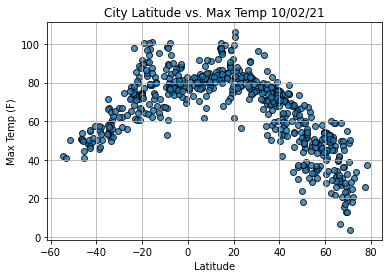

In [40]:
import time

# plotting the lats v maxtemp
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')
# format graph
plt.title(f"City Latitude vs. Max Temp {time.strftime('%x')}")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')
plt.show()

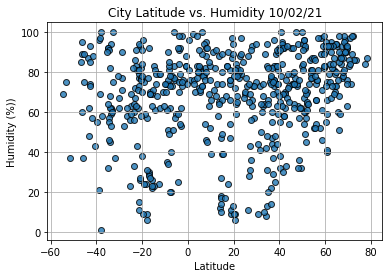

In [41]:
# plotting the lats v humidity
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')
# format graph
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel('Humidity (%))')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')
plt.show()

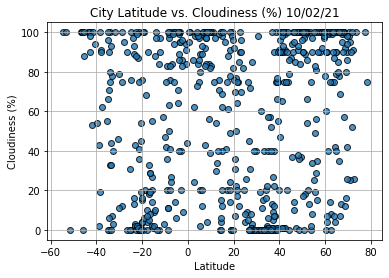

In [42]:
# plotting the lats v cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')
# format graph
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')
plt.show()

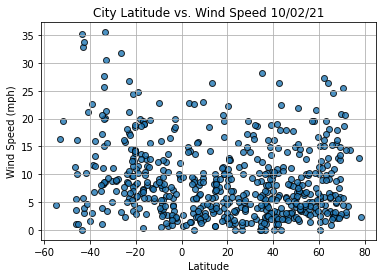

In [44]:
# plotting the lats v wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')
# format graph
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')
plt.show()

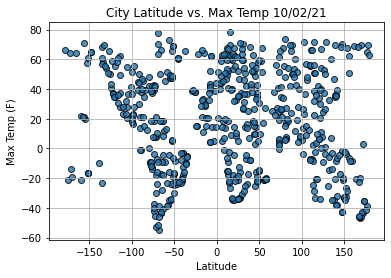

In [46]:
# lol
plt.scatter(city_df['Long'],
            lats,
           edgecolor='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')
# format graph
plt.title(f"City Latitude vs. Max Temp {time.strftime('%x')}")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

# Lilnear Regression

In [47]:
from scipy.stats import linregress

In [56]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # regression for the weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #clac and save the y values
    regress_values = x_values * slope + intercept
    
    # line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # annotation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [60]:
northern_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Lat"] < 0)]

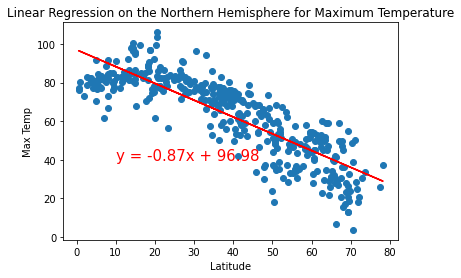

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

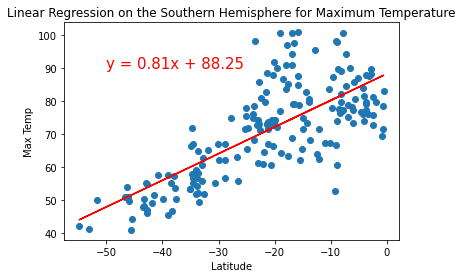

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

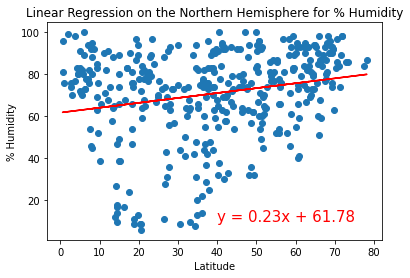

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

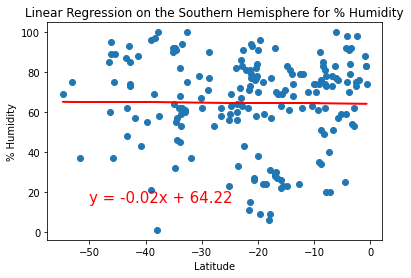

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

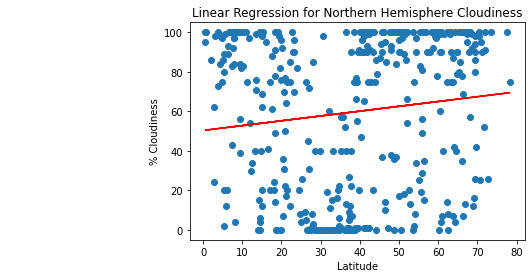

In [68]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Clouds'],
                       'Linear Regression for Northern Hemisphere Cloudiness',
                      '% Cloudiness', (-50, 60))

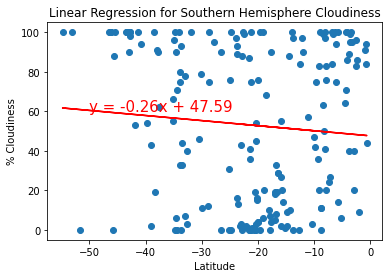

In [70]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Clouds'],
                       'Linear Regression for Southern Hemisphere Cloudiness',
                      '% Cloudiness', (-50, 60))

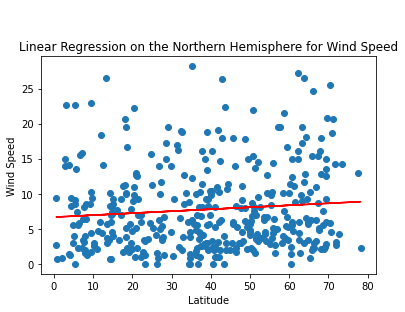

In [72]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

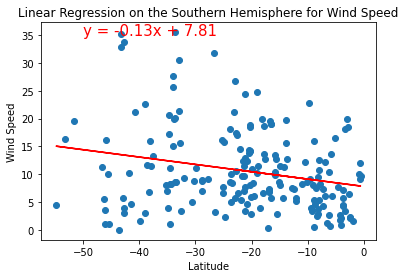

In [73]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))